Check GPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Jun  1 21:22:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Load Google Drive 

In [2]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive
/content/gdrive/My Drive


Location of spectograms for home location, small sample testing

In [ ]:
cd /content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset

/content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset


In [ ]:
! ls -lrt /content/gdrive/MyDrive/urbansound/spectograms/ 

total 746
drwx------ 2 root root   4096 May  8 14:51 test
drwx------ 2 root root   4096 May  8 14:51 train
drwx------ 2 root root   4096 May  8 14:51 validation
drwx------ 2 root root   4096 May  8 18:17 timestretch_test
drwx------ 2 root root   4096 May 17 15:20 all
-rw------- 1 root root 243539 May 17 17:58 urbansound8klabels.csv
-rw------- 1 root root 209701 May 17 19:14 urbansound8klabels_v2.csv
-rw------- 1 root root 285323 May 18 00:33 urbansound8klabels_v3.csv
drwx------ 6 root root   4096 May 18 03:53 protosound


In [3]:
%tensorflow_version  1.x

TensorFlow 1.x selected.


**Model**

Check folders

In [ ]:
import pandas as pd
import os
import shutil

dir1 = '/content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/validation'
dir2 = '/content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/train'
dir3 = '/content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/test'


validations = os.listdir(dir1)
trains = os.listdir(dir2)
tests = os.listdir(dir3)
print(trains)
print(tests)
#if os.path.isdir(targetdir_chk) == False:
    # os.mkdir(targetdir_chk)
#    print(targetdir_chk + ' directory does not exist so it was created')

list_difference = []
for item in validations:
  if item not in trains:
    list_difference.append(item)

print('the following are missing directories:')
print(list_difference)

#create the missing directories in test
for item in list_difference:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

######################
list_difference2 = []
for item in tests:
  if item not in validations:
    list_difference2.append(item)

print('the following are missing directories:')
print(list_difference2)

#create the missing directories in test
for item in list_difference2:
    print(item)
    dir2create = '/Users/gracie/ML/AEA_dataset/freesound/spectograms/validation/'+item
    if os.path.isdir(item) == False:
        #os.mkdir(dir2create)
        print(dir2create + ' created')

FileNotFoundError: ignored

Dataset for protosound only

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

#training_dir = '/content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/train'
training_dir = '/content/gdrive/MyDrive/content/img_dir/us8k_freesound/train/'
#validation_dir = '/content/gdrive/MyDrive/content/img_dir/us8k_freesound/all_labeled/'
validation_dir = '/content/gdrive/MyDrive/content/img_dir/us8k_freesound/test/'
test_dir = '/content/gdrive/MyDrive/content/img_dir/us8k_freesound/test/'

folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

print ('Total Classes = ' + str(num_classes))
print('Total training classes '+str(len(glob(training_dir + '/*'))))
print('Total test classes '+str(len(glob(test_dir + '/*'))))
print('Toral validation classes '+str(len(glob(validation_dir + '/*'))))

Total Classes = 206
Total Classes = 206
Total training classes 206
Total test classes 189
Toral validation classes 189


Import Libraries

In [5]:
# importing requried libraries
from keras import applications
from keras.models import Model
import keras 
from keras.applications.vgg16 import VGG16 #Importing the VGG16 Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from keras.applications import VGG16, MobileNetV2
from keras.optimizers import SGD
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input  

Using TensorFlow backend.


**Data pre-processing**

In [11]:
IMAGE_SIZE = [224,224]
BATCH_SIZE = 256

training_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,samplewise_center=True, samplewise_std_normalization=True)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode = 'categorical')
training_generator.class_indices


Found 43690 images belonging to 206 classes.
Found 5911 images belonging to 189 classes.


{'Accelerating_and_revving_and_vroom': 0,
 'Accordion': 1,
 'Acoustic_guitar': 2,
 'Aircraft': 3,
 'Alarm': 4,
 'Animal': 5,
 'Applause': 6,
 'Bark': 7,
 'Bass_drum': 8,
 'Bass_guitar': 9,
 'Bathtub_filling_or_washing': 10,
 'Bell': 11,
 'Bicycle': 12,
 'Bicycle_bell': 13,
 'Bird': 14,
 'Bird_vocalization_and_bird_call_and_bird_song': 15,
 'Boat_and_Water_vehicle': 16,
 'Boiling': 17,
 'Boom': 18,
 'Bowed_string_instrument': 19,
 'Brass_instrument': 20,
 'Breathing': 21,
 'Burping_and_eructation': 22,
 'Bus': 23,
 'Buzz': 24,
 'Camera': 25,
 'Car': 26,
 'Car_passing_by': 27,
 'Cat': 28,
 'Chatter': 29,
 'Cheering': 30,
 'Chewing_and_mastication': 31,
 'Chicken_and_rooster': 32,
 'Child_speech_and_kid_speaking': 33,
 'Chime': 34,
 'Chink_and_clink': 35,
 'Chirp_and_tweet': 36,
 'Chuckle_and_chortle': 37,
 'Church_bell': 38,
 'Clapping': 39,
 'Clock': 40,
 'Coin_dropping': 41,
 'Computer_keyboard': 42,
 'Conversation': 43,
 'Cough': 44,
 'Cowbell': 45,
 'Crack': 46,
 'Crackle': 47,
 'Cra

In [ ]:
# 255 batch size
IMAGE_SIZE = [224,224]
BATCH_SIZE = 32

training_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40, 
                                      width_shift_range=0.3, height_shift_range=0.3, 
                                      shear_range=0.3, horizontal_flip=True, fill_mode="nearest",
                                      preprocessing_function=preprocess_input,
                                      samplewise_center=True, samplewise_std_normalization=True)
training_generator = training_datagen.flow_from_directory(directory=training_dir,target_size = IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode = 'categorical')
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, samplewise_center=True, samplewise_std_normalization=True)
validation_generator = validation_datagen.flow_from_directory(directory=test_dir, target_size = IMAGE_SIZE, batch_size = BATCH_SIZE, class_mode = 'categorical')
training_generator.class_indices


Found 6787 images belonging to 10 classes.
Found 1747 images belonging to 10 classes.


{'air_conditioner': 0,
 'car_horn': 1,
 'children_playing': 2,
 'dog_bark': 3,
 'drilling': 4,
 'engine_idling': 5,
 'gun_shot': 6,
 'jackhammer': 7,
 'siren': 8,
 'street_music': 9}

Load VGG16, add extra layer and compile

In [12]:
vgg_model = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  

for layer in vgg_model.layers:
      layer.trainable = False # Non trainable weights

# Create Dense Layers
# Add the last layers (Flatten and Dense layers) for our problem
x = Flatten()(vgg_model.output) 
x = Dense(num_classes, activation = 'softmax')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting

transfer_model = Model(inputs = vgg_model.input, outputs = x)
# Compile model, for this we will be using ADAM optimiser to reach to the global minima while training our model
# learning_rate= 5e-5
transfer_model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

#transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
transfer_model.summary() #check summary of the model using this command


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# 43690 images, 256 batch size 
history = transfer_model.fit_generator(training_generator,
                   steps_per_epoch =171, #Number of iterations = number of training images (49,225) / batch size (255)  
                   epochs = 10, 
                   validation_data = validation_generator,
                   validation_steps = 2, #same for validation data 300 validation images
                   shuffle = True) 
transfer_model.save('/content/gdrive/MyDrive/final/vgg16_us8k_urbansound_spp34_10ep.h5')

Epoch 1/10


/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 96 could not be retrieved. It could be because a worker has died.
  UserWarning)


  1/171 [..............................] - ETA: 6:06:58 - loss: 10.2458 - accuracy: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/171 [..............................] - ETA: 6:04:53 - loss: 10.0509 - accuracy: 0.0215    

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/171 [..............................] - ETA: 6:03:32 - loss: 10.1360 - accuracy: 0.0312

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


  4/171 [..............................] - ETA: 6:01:02 - loss: 10.2978 - accuracy: 0.0342

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


  5/171 [..............................] - ETA: 5:58:43 - loss: 10.3485 - accuracy: 0.0414

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 117 could not be retrieved. It could be because a worker has died.
  UserWarning)


  6/171 [>.............................] - ETA: 5:55:04 - loss: 10.4067 - accuracy: 0.0456

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 153 could not be retrieved. It could be because a worker has died.
  UserWarning)


  7/171 [>.............................] - ETA: 5:53:36 - loss: 10.4048 - accuracy: 0.0525

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


  8/171 [>.............................] - ETA: 5:52:00 - loss: 10.4449 - accuracy: 0.0547

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


  9/171 [>.............................] - ETA: 5:49:59 - loss: 10.5100 - accuracy: 0.0569

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 161 could not be retrieved. It could be because a worker has died.
  UserWarning)


 10/171 [>.............................] - ETA: 5:47:35 - loss: 10.4209 - accuracy: 0.0590

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


 11/171 [>.............................] - ETA: 5:44:34 - loss: 10.4515 - accuracy: 0.0621

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 114 could not be retrieved. It could be because a worker has died.
  UserWarning)


 12/171 [=>............................] - ETA: 5:41:32 - loss: 10.4115 - accuracy: 0.0658

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


 13/171 [=>............................] - ETA: 5:38:57 - loss: 10.4143 - accuracy: 0.0688

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


 14/171 [=>............................] - ETA: 5:36:39 - loss: 10.3726 - accuracy: 0.0731

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/171 [=>............................] - ETA: 5:34:11 - loss: 10.3411 - accuracy: 0.0760

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 16/171 [=>............................] - ETA: 5:31:53 - loss: 10.2988 - accuracy: 0.0791

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 136 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/171 [=>............................] - ETA: 5:29:35 - loss: 10.2655 - accuracy: 0.0841

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 146 could not be retrieved. It could be because a worker has died.
  UserWarning)


 18/171 [==>...........................] - ETA: 5:27:21 - loss: 10.2423 - accuracy: 0.0872

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 127 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/171 [==>...........................] - ETA: 5:24:35 - loss: 10.2089 - accuracy: 0.0919

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 20/171 [==>...........................] - ETA: 5:21:59 - loss: 10.2308 - accuracy: 0.0938

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 137 could not be retrieved. It could be because a worker has died.
  UserWarning)


In [ ]:
# 8534 images, 32 batch size 
history = transfer_model.fit_generator(training_generator,
                   steps_per_epoch =267, #Number of iterations = number of training images (49,225) / batch size (255)  
                   epochs = 10, 
                   validation_data = validation_generator,
                   validation_steps = 2, #same for validation data 300 validation images
                   shuffle = True) 
transfer_model.save('/content/gdrive/MyDrive/final/us8k_TeslaP100_vgg16_267stepsPE_10epochs_Param.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
267/267 [==============================] - 1083s 4s/step - loss: 0.7286 - accuracy: 0.1191 - val_loss: 1.1921e-07 - val_accuracy: 0.1250
Epoch 2/10
267/267 [==============================] - 48s 180ms/step - loss: 1.1921e-07 - accuracy: 0.1189 - val_loss: 1.1921e-07 - val_accuracy: 0.1875
Epoch 3/10
267/267 [==============================] - 48s 180ms/step - loss: 1.1921e-07 - accuracy: 0.1182 - val_loss: 1.1921e-07 - val_accuracy: 0.0938
Epoch 4/10
267/267 [==============================] - 48s 180ms/step - loss: 1.1921e-07 - accuracy: 0.1171 - val_loss: 1.1921e-07 - val_accuracy: 0.1406
Epoch 5/10
267/267 [==============================] - 48s 181ms/step - loss: 1.1921e-07 - accuracy: 0.1188 - val_loss: 1.1921e-07 - val_accuracy: 0.0625
Epoch 6/10
267/267 [==============================] - 48s 180ms/step - loss: 1.1921e-07 - accuracy: 0.1163 - val_loss: 1.1921e-07 - val_accuracy:

In [ ]:
# 8534 images, 32 batch size 
history = transfer_model.fit_generator(training_generator,
                   steps_per_epoch =267, #Number of iterations = number of training images (49,225) / batch size (255)  
                   epochs = 100, 
                   validation_data = validation_generator,
                   validation_steps = 2, #same for validation data 300 validation images
                   shuffle = True) 
transfer_model.save('/content/gdrive/MyDrive/final/us8k_TeslaP100_vgg16_32batchsize_100epochs_Param.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
267/267 [==============================] - 961s 4s/step - loss: 0.3778 - accuracy: 0.1208 - val_loss: 1.1921e-07 - val_accuracy: 0.0469
Epoch 2/100
267/267 [==============================] - 37s 139ms/step - loss: 1.1921e-07 - accuracy: 0.1202 - val_loss: 1.1921e-07 - val_accuracy: 0.1250
Epoch 3/100
267/267 [==============================] - 38s 141ms/step - loss: 1.1921e-07 - accuracy: 0.1159 - val_loss: 1.1921e-07 - val_accuracy: 0.1094
Epoch 4/100
267/267 [==============================] - 37s 139ms/step - loss: 1.1921e-07 - accuracy: 0.1165 - val_loss: 1.1921e-07 - val_accuracy: 0.1094
Epoch 5/100
267/267 [==============================] - 37s 139ms/step - loss: 1.1921e-07 - accuracy: 0.1187 - val_loss: 1.1921e-07 - val_accuracy: 0.1406
Epoch 6/100
267/267 [==============================] - 37s 139ms/step - loss: 1.1921e-07 - accuracy: 0.1162 - val_loss: 1.1921e-07 - val_accu

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/final/AED_TeslaP100_vgg16_full_1082_Param.h5')

AttributeError: ignored

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 15.7 MB 92.4 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.

Model Testing

In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
import numpy as np
import os
img_size = 224
dir_loc ='/content/gdrive/MyDrive/final/dataset3/test'
clssN = os.listdir(dir_loc)

#clssN = ['Heidelberglaan15','Padualaan101','Padualaan97']
count = 0
countT = 0
for bl in clssN:
  src = './dataset/test/' + bl 
  imgs = os.listdir(src)
  count = 0
  countT = len(imgs) #total number of images per class
  for img in imgs: 
    im = load_img(src + "/" + img)
    w,h = im.size
    im = im.resize((int(w*0.2),int(h*0.2)))
    im = im.resize((img_size,img_size))
    x = img_to_array(im)  
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x/=255.
    probs = transfer_model.predict(x, verbose=0)
    maxDet = max(probs[0])
    maxIdx = list(probs[0]).index(maxDet) #predicted class with maximum probability
    if (clssN[maxIdx]==bl): 
      count = count + 1  #count for true predictions (true positives)
    else:
      print(f'Wrong prediction of {bl}  {img}. Predicted as {clssN[maxIdx]}') 
  print(f'test accuracy for {bl} is {str(count/countT)}')

Using the below code, you will see the output of what building class the model has predicted for this specific image.

Plotting loss and accuracy

KeyError: ignored

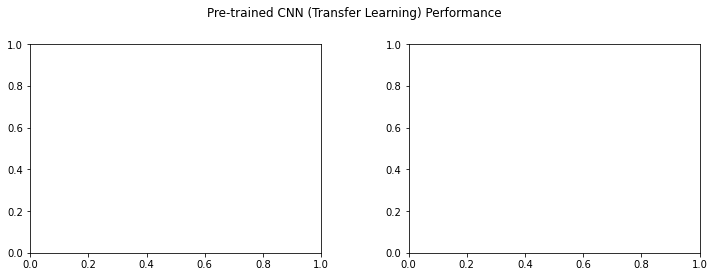

In [ ]:
#import matplotlib as plt
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")